In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## DFT & IDFT Implementation

In [3]:
def DFT(x):
    X=[]
    N=len(x)
    n_array=np.array(list(range(N))).reshape(-1,1)
    pm=np.dot(n_array,n_array.T) #power matrix power element_ij= WN**(i-1)(j-1)
    WN=np.full((N,N),np.exp(-2j*np.pi/N))# W matrix to get FN
    FN=WN**pm # FN by powres of WN

    X=np.dot(FN,x) # X=FX eqn in the slides
    """
    for m in range(len(x)):
        Xm=0
        for n in range(len(x)):
            Xm+= x[n]*(mt.cos(2*np.pi*n*m/N)-1j*mt.sin(2*np.pi*n*m/N))
        X.append(Xm)"""
    
    return np.array(X)
            

def IDFT(X):
    x=[]
    N=len(X)
    n_array=np.array(list(range(N))).reshape(-1,1)
    pm=np.dot(n_array,n_array.T) #power matrix power element_ij= WN**(i-1)(j-1)
    WN=np.full((N,N),np.exp(-2j*np.pi/N)) # W matrix to get FN
    FN=WN**pm # FN by powres of WN
    x=np.dot(np.linalg.pinv(FN),X) # x=inv(F)XN eqn in the slides
    """

    for n in range(len(X)):
        xn=0
        for m in range(len(X)):
            xn+= X[m]*(mt.cos(2*np.pi*n*m/N)+1j*mt.sin(2*np.pi*n*m/N))
        x.append(xn/N)
        """
    
    return np.array(x)

In [4]:
#sanity check
print("DFT:", DFT([1,2,3]))
print("IDFT: ",IDFT(DFT([1,2,3])))

DFT: [ 6. +0.j        -1.5+0.8660254j -1.5-0.8660254j]
IDFT:  [1.-8.32667268e-16j 2.-6.66133815e-16j 3.+0.00000000e+00j]


In [5]:
def plot_FT(n,XR,XI, polar=False):
    titles=('Real','Imaginary') if not polar else ('Magnitude','Phase')
    plt.scatter(n,XR,marker='x',s=80,color='k')
    plt.title("%s Part of the DFT"%(titles[0]))
    plt.xlabel("m")
    plt.ylabel("Amplitude")
    plt.vlines(n,linestyles='dashed',color='black',ymin=0,ymax=XR)
    plt.show()
    
    plt.scatter(n,XI,marker='x',s=80,color='k')
    plt.title("%s Part of the DFT"%(titles[1]))
    plt.xlabel("m")
    plt.ylabel("Amplitude")
    plt.vlines(n,linestyles='dashed',color='black',ymin=0,ymax=XI)

    plt.show()

## Q1

In [6]:
def F1(n): # the signal
    return (np.sin(2* np.pi *n / 40) + 2* np.sin(2* np.pi* n / 16)) *np.exp(-((n-128) / 64)**2)

In [42]:
n=np.arange(1,200,0.5)
x = F1(n)

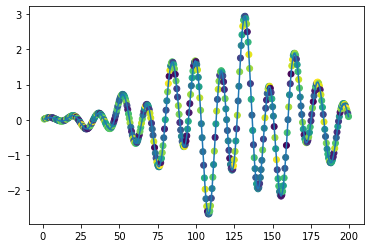

In [44]:
plt.scatter(n,x,c=np.random.rand(len(n)));
plt.plot(n,x); # plot the signal

## Q2

In [9]:
#samples
n=np.arange(0,256,1)
x=F1(n)
X=DFT(x)

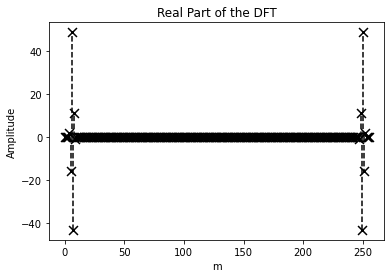

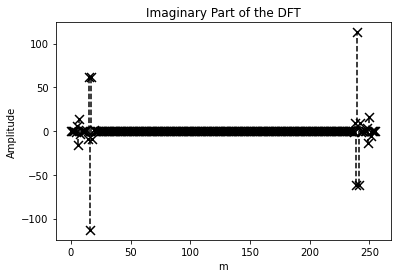

In [10]:
#get real and imaginary part
XR, XI=np.real(X), np.imag(X)
# plot 

plot_FT(n,XR,XI)


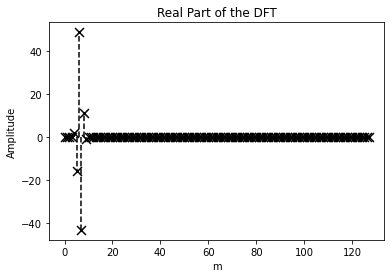

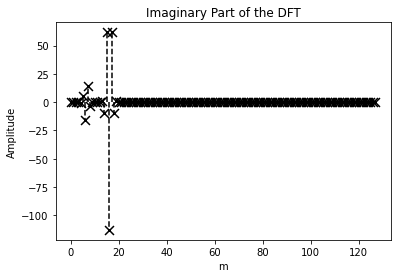

In [11]:
# plot only the first half
 
plot_FT(n[:128],XR[:128],XI[:128])


In [12]:
#number of unique frequnecy components, the signal has 6 unique frequency components
np.unique(np.round(XR[:len(n)//2],0),return_counts=True)

(array([-43., -16.,  -1.,   0.,   2.,  11.,  49.]),
 array([  1,   1,   1, 122,   1,   1,   1], dtype=int64))

## Q3

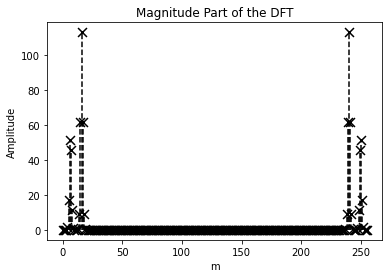

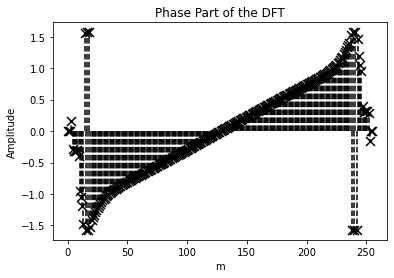

In [13]:
#plot phase and mag
X_magnitude=np.sqrt(XR**2+XI**2)
X_phase=np.arctan(np.round(XI/XR,4)) # arctan imgainary/real
plot_FT(n,X_magnitude,X_phase,polar=True)


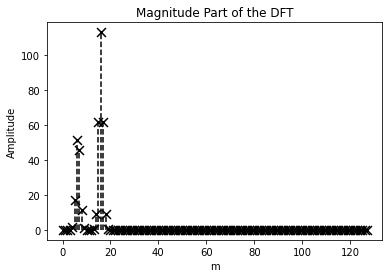

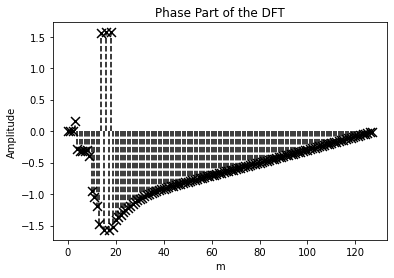

In [14]:
# plot only the first half
plot_FT(n[:128],X_magnitude[:128],X_phase[:128],polar=True)

## Q4

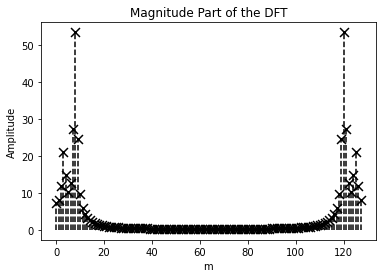

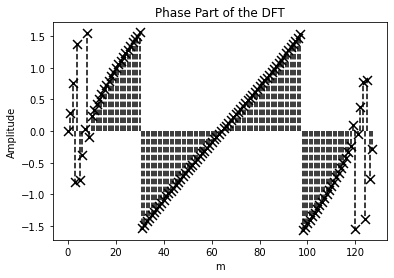

In [16]:
#samples
n=np.arange(0,128,1) #128 pt DFT
x=F1(n)
X=DFT(x)
#get real and imaginary part
XR, XI=np.real(X), np.imag(X)

X_magnitude=np.sqrt(XR**2+XI**2)
X_phase=np.arctan(XI/XR) # arctan imgainary/real
plot_FT(n,X_magnitude,X_phase,polar=True)


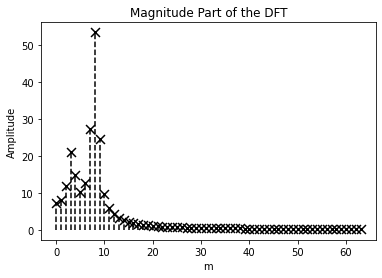

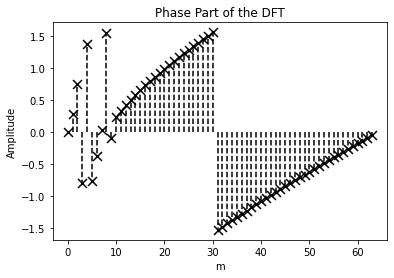

In [17]:
# plot the first half only 
plot_FT(n[:64],X_magnitude[:64],X_phase[:64],polar=True)


In [18]:
#get the numb of unique values
np.unique(np.round(X_magnitude[:len(n)//2],0),return_counts=True) # 16 unique frequencies

(array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8., 10., 12., 13., 15., 21.,
        25., 27., 54.]),
 array([32, 14,  3,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1],
       dtype=int64))

## Q5 can be found in the report

## Q6

In [19]:
n=np.arange(0,256,1)
x=F1(n)
X=DFT(x)

#TAKE inverse DFT
x2=np.round(IDFT(X),6)

C:\Users\OmerHassan\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


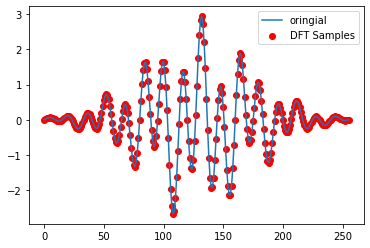

In [20]:
plt.plot(x)
plt.scatter(n,x2,color='r')
plt.legend(('oringial', 'DFT Samples'));
plt.show()

<ipython-input-21-b3b688b7ca51>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x-x2))


Text(0.5, 1.0, 'error between real samples and IDFT samples')

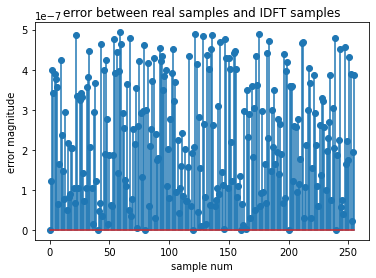

In [21]:
# errors between the original signal samples and the ones genrated using the IDFT
plt.stem(np.abs(x-x2))
plt.xlabel('sample num')
plt.ylabel('error magnitude')
plt.title('error between real samples and IDFT samples')

 ##### from the error values above, we can conclude that the values of the samples generated by the IDFT is extremely close to those taken from the original signal.

## Q7 & Q8

In [22]:
from scipy.io import wavfile
from IPython.display import Audio

In [45]:
sr,x=wavfile.read('audio_mono.wav');

In [46]:
sr

8000

In [48]:
#display orignial audio
Audio(x,rate=sr)

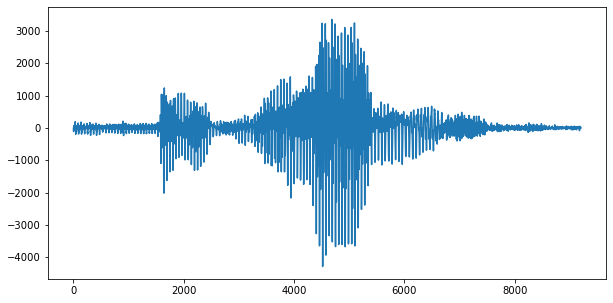

In [49]:
#plot audio wave
plt.figure(figsize=(10,5))
plt.plot(x);

In [50]:
# since it has lenght of one second with sampling rate  8 k, we use the same sampling rate

x2=IDFT(DFT(x)) #get the IDFT of the DFT of the original data

In [51]:
x2

array([-13.-8.81510143e-13j, -52.+2.64133507e-12j, -97.-4.10279449e-13j,
       ...,  23.-6.77052164e-12j,  12.+2.49460175e-13j,
       -19.-2.59633981e-12j])

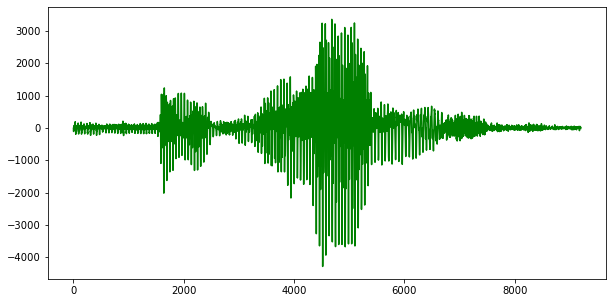

In [54]:
#plot audio wave
plt.figure(figsize=(10,5))
plt.plot(np.real(x2), color='g');

In [53]:
# display the generated audio
Audio(np.real(x2),rate=sr)

##### The generated audio is the same as the original audio; you can listen to both by playing the audio that was displayed using Ipython.dislay